In [1]:
# import basic libraries and packages
#import import_ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedShuffleSplit

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, zero_one_loss,precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score,precision_recall_curve, roc_curve

from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import ADASYN
from prettytable import PrettyTable

## Dataset Information

Default of credit card client data set is downloaded from the UCI Machine Learning Repository. Using this dataset, the research was aimed at the customers (credit card holders) with default payments in Taiwan and predict the accuracy of default class.

The source of this dataset is Department of Information Management, Chung Hua University, Taiwan and Department of Civil Engineering, Tamkang University, Taiwan where the original research was done. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

__Number of Instances:__ 30000

__Response Variable:__

The response variable is a binary variable "default payment next month" with default payment (1=yes, 0=no)

__Feature Variables:__

There are 23 total feature variables with 14 numeric variables and 9 categorical variables

Catagorical variables:

- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, '-'= unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)

Scale for next 6 categorical variables: (-2=no consumption, 0, -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_0: Repayment status in September, 2005 (scale same as above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)

Numeric or Continous Variables:

- AGE: Age in years
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

NT dollar stands for New Taiwan dollar.

## Read and load the data

In [2]:
# Read and load the data files into a dataframe
credit_df = pd.read_csv("default_of_credit_card_clients1.csv")
print(credit_df.head(2))

   LIMIT_BAL  SEX EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0      20000    2         2         1   24      2      2     -1     -1     -2   
1     120000    2         2         2   26     -1      2      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  

[2 rows x 24 columns]


Next we will change the column names to lower case and modify name of our response variable 'default payment next month'.

In [3]:
credit_df.columns = map(str.lower, credit_df.columns)
credit_df = credit_df.rename(columns={'default payment next month':'default_paymt'})
print(credit_df.head(5))

   limit_bal  sex education  marriage  age  pay_0  pay_2  pay_3  pay_4  pay_5  \
0      20000    2         2         1   24      2      2     -1     -1     -2   
1     120000    2         2         2   26     -1      2      0      0      0   
2      90000    2         2         2   34      0      0      0      0      0   
3      50000    2         2         1   37      0      0      0      0      0   
4      50000    1         2         1   57     -1      0     -1      0      0   

   ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   pay_amt4  pay_amt5  pay_amt6  default_paymt  
0         0         0    

## Data Cleaning and Feature Engineering

We will check the dataset for missing values, data types and statistics before further visualization.

In [4]:
print(credit_df.columns)
print()
print("Check for missing values:")
print(credit_df.isnull().sum())

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_paymt'],
      dtype='object')

Check for missing values:
limit_bal        0
sex              0
education        0
marriage         0
age              0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
bill_amt1        0
bill_amt2        0
bill_amt3        0
bill_amt4        0
bill_amt5        0
bill_amt6        0
pay_amt1         0
pay_amt2         0
pay_amt3         0
pay_amt4         0
pay_amt5         0
pay_amt6         0
default_paymt    0
dtype: int64


There are no missing or null values. Next we will check the data types of columns and check some samples of the data.

In [5]:
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   limit_bal      30000 non-null  int64 
 1   sex            30000 non-null  int64 
 2   education      30000 non-null  object
 3   marriage       30000 non-null  int64 
 4   age            30000 non-null  int64 
 5   pay_0          30000 non-null  int64 
 6   pay_2          30000 non-null  int64 
 7   pay_3          30000 non-null  int64 
 8   pay_4          30000 non-null  int64 
 9   pay_5          30000 non-null  int64 
 10  pay_6          30000 non-null  int64 
 11  bill_amt1      30000 non-null  int64 
 12  bill_amt2      30000 non-null  int64 
 13  bill_amt3      30000 non-null  int64 
 14  bill_amt4      30000 non-null  int64 
 15  bill_amt5      30000 non-null  int64 
 16  bill_amt6      30000 non-null  int64 
 17  pay_amt1       30000 non-null  int64 
 18  pay_amt2       30000 non-n

We can see here that some of the columns have categorical data, but show up as data type int64. These columns need to be converted to category type. The education column is of type object, but we will change it to type category.

In [6]:
col = ['sex', 'education', 'marriage', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']
credit_df[col] = credit_df[col].astype('category')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   limit_bal      30000 non-null  int64   
 1   sex            30000 non-null  category
 2   education      30000 non-null  category
 3   marriage       30000 non-null  category
 4   age            30000 non-null  int64   
 5   pay_0          30000 non-null  category
 6   pay_2          30000 non-null  category
 7   pay_3          30000 non-null  category
 8   pay_4          30000 non-null  category
 9   pay_5          30000 non-null  category
 10  pay_6          30000 non-null  category
 11  bill_amt1      30000 non-null  int64   
 12  bill_amt2      30000 non-null  int64   
 13  bill_amt3      30000 non-null  int64   
 14  bill_amt4      30000 non-null  int64   
 15  bill_amt5      30000 non-null  int64   
 16  bill_amt6      30000 non-null  int64   
 17  pay_amt1       30000 non-null  

### Handling missing information or missing values for categorical columns

Looking at the unique categories of the features there are some categories that we don't have any information. For example like '-' and '0' for column 'education' that we don't have any information. Known information for this column is, 1 = graduate school; 2 = university; 3 = high school; 4 = others. We can say that '0','-', '5', and '6' are unknown categories. So we will map them to category '4' as others.

For the column 'marriage', we only have three categories, 1 = married, 2 = single, 3 = others. There is no category 0 although we have 0 as values. Hence we will assign 0 values to others category which is 3.

Leave the payment history columns as is.

In [7]:
# Select categorical features only from dataset
cat_cols = credit_df[['sex', 'education', 'marriage', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']].copy()
print(cat_cols.head())

  sex education marriage pay_0 pay_2 pay_3 pay_4 pay_5 pay_6
0   2         2        1     2     2    -1    -1    -2    -2
1   2         2        2    -1     2     0     0     0     2
2   2         2        2     0     0     0     0     0     0
3   2         2        1     0     0     0     0     0     0
4   1         2        1    -1     0    -1     0     0     0


In [8]:
# Number of unique values in categorical features
cat_cols.nunique()

sex           2
education     8
marriage      4
pay_0        11
pay_2        11
pay_3        11
pay_4        11
pay_5        10
pay_6        10
dtype: int64

In [9]:
# Check unique categories for education column.
# No changes required
credit_df['sex'].unique()

[2, 1]
Categories (2, int64): [1, 2]

In [10]:
# Check unique categories for education column.
credit_df['education'].unique()

['2', '-', '1', '3', '5', '4', '6', '0']
Categories (8, object): ['-', '0', '1', '2', '3', '4', '5', '6']

In [11]:
# Addressing values '-', '0','5', and '6' in column 'education' (unknown data or missing information)
# Assign them as others which is '4'
cat_cols['education'] = cat_cols.education.replace('-', 4)
cat_cols['education'] = cat_cols.education.replace('0', 4)
cat_cols['education'] = cat_cols.education.replace('5', 4)
cat_cols['education'] = cat_cols.education.replace('6', 4)
cat_cols['education'] = cat_cols.education.replace('4', 4)
cat_cols['education'] = cat_cols.education.replace('1', 1)
cat_cols['education'] = cat_cols.education.replace('2', 2)
cat_cols['education'] = cat_cols.education.replace('3', 3)

In [12]:
cat_cols.education.unique()

[2, 4, 1, 3]
Categories (4, int64): [4, 1, 2, 3]

In [13]:
# Check unique categories for marriage column.
credit_df['marriage'].unique()

[1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

In [14]:
# Address 0 values in column 'marriage' to others category which is 3
cat_cols['marriage'] = cat_cols.marriage.replace(0, 3)
cat_cols['marriage'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [15]:
# randomly select two of the variables showing history of past payments
# Leave as is
print(credit_df['pay_4'].unique())
print(credit_df['pay_0'].unique())

[-1, 0, -2, 2, 3, ..., 5, 7, 6, 1, 8]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]
[2, -1, 0, -2, 1, ..., 4, 8, 7, 5, 6]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]


In [16]:
# Select numerical features only from dataset
num_cols = credit_df.drop(['sex', 'education', 'marriage', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1)
print(num_cols.columns)
print(num_cols.head())

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_paymt'],
      dtype='object')
   limit_bal  age  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0      20000   24       3913       3102        689          0          0   
1     120000   26       2682       1725       2682       3272       3455   
2      90000   34      29239      14027      13559      14331      14948   
3      50000   37      46990      48233      49291      28314      28959   
4      50000   57       8617       5670      35835      20940      19146   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      2

 ## Exploratory Data Analysis with Visualization

            limit_bal           age      bill_amt1      bill_amt2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          bill_amt3      bill_amt4      bill_amt5      bill_amt6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    

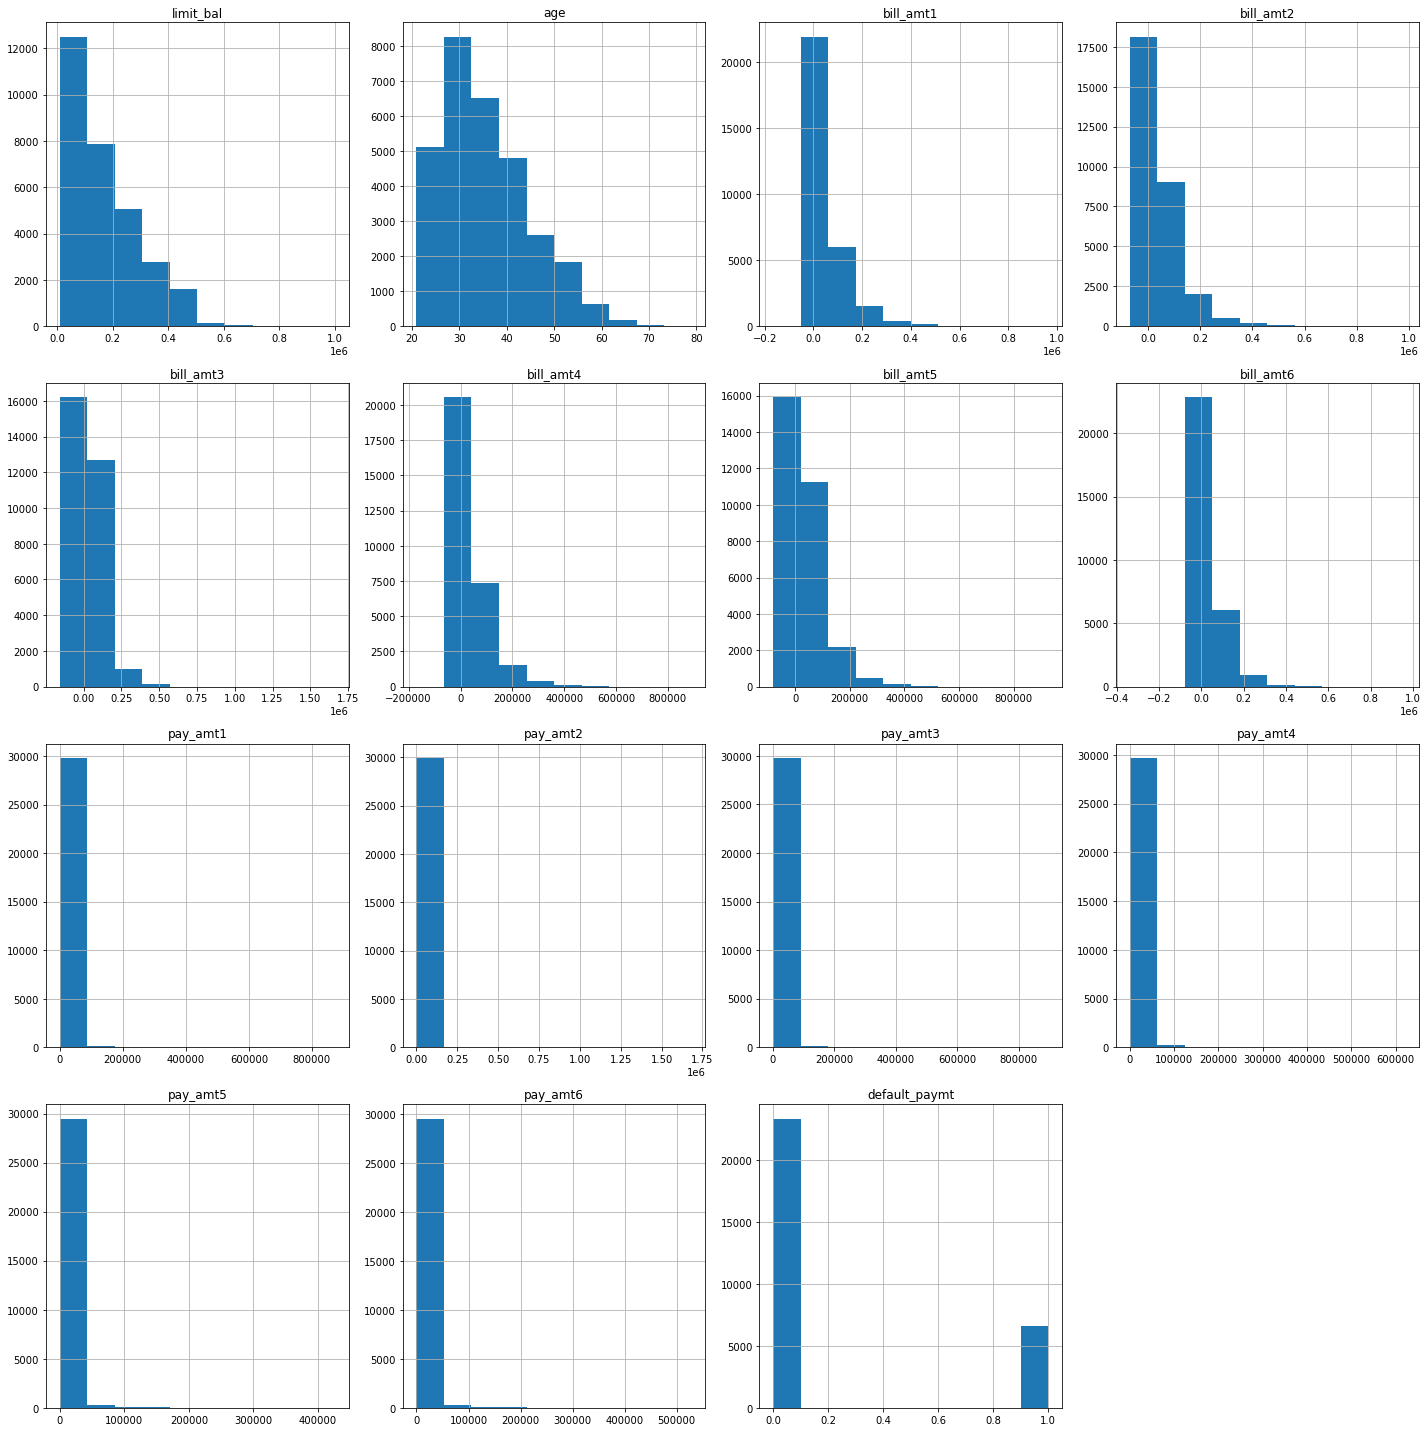

In [17]:
# Descriptive statistics for numeric columns
print(credit_df.describe())
credit_df.hist(bins=10, figsize=(20,20))
plt.tight_layout()
plt.show()

In [18]:
# check class distribution imbalance as percentage
credit_df['default_paymt'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_paymt, dtype: float64

0    23364
1     6636
Name: default_paymt, dtype: int64


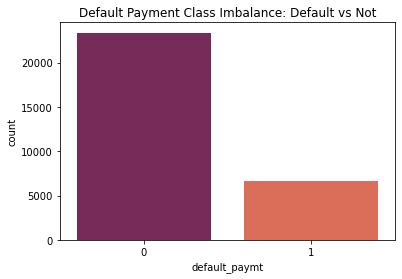

In [19]:
# check class distribution count
print(credit_df['default_paymt'].value_counts())
sns.countplot(x='default_paymt', data=credit_df, palette='rocket')
plt.title("Default Payment Class Imbalance: Default vs Not")
plt.show()

<b> Challenge of Imbalanced Classification:<b/>

Any dataset with an unequal class distribution is said to be imbalanced when there is a significant or extreme disproportion among the number of examples of each class of the problem. Although there may be other reasons, the imbalance might be a property of the problem domain for cases like ours i.e. default prediction. Some of the common ones are fraud detection, disease prediction, intrusion detection, etc. where the model's skill is predicting the minority class (with few examples) correctly.  
    
The class imbalance ratio here is 0.7788 for majority class 0 and 0.2212 for minority class 1 (Default or class we are interested in) which is slight imbalance and not a major concern. We will address this by using sklearn's StratifiedShuffleSplit when splitting the data and add oversampling method to the estimator pipeline.

In [20]:
# Combine categorical and numerical columns
credit_df1 = pd.concat([cat_cols, num_cols], axis=1)
credit_df1.head()

,sex,education,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_bal,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_paymt
0,2,2,1,2,2,-1,-1,-2,-2,20000,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,-1,2,0,0,0,2,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,0,0,0,0,0,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,0,0,0,0,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,-1,0,-1,0,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


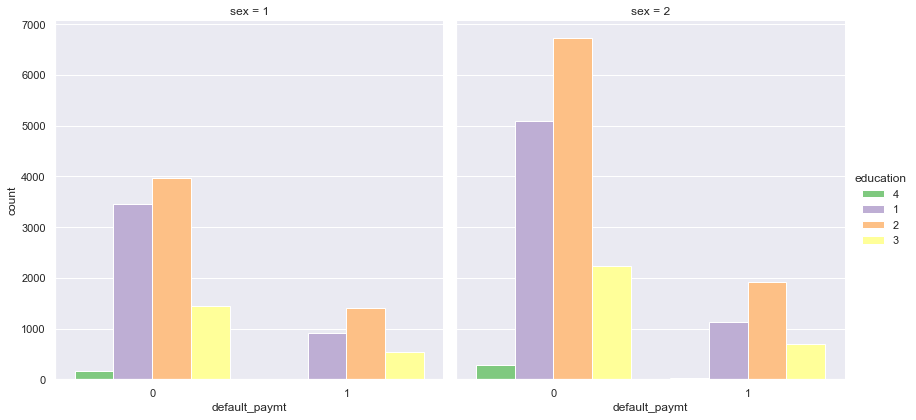

In [21]:
# Let's plot default based upon education and sex
sns.set(style="darkgrid")
sns.catplot(x='default_paymt', hue='education',
            col='sex', kind='count',saturation=1,
            palette='Accent', data=credit_df1,height=6, aspect=1)

plt.show()

<b>Keys:</b>
 sex, 1 = male; 2 = female
 education, 1 = graduate school; 2 = university; 3 = high school; 4 = others
 default payment, 1 = yes; 0 = no
    
Over all looking at the plot we can say the the count of defaulters is slightly higher in women than men and we can also observe that count of non-defaulters is higher in women than men.

Among both genders, most of the credit cald holders have education level as graduate school and University.

In [22]:
# Let's check the frequency of credit limit balance by group
credit_lim = credit_df1['limit_bal'].value_counts()
print(credit_lim.shape) # print number of credit limit groups
print(credit_lim.head(10))

(81,)
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: limit_bal, dtype: int64


(20.942, 32.6]    13388
(32.6, 44.2]      11326
(44.2, 55.8]       4442
(55.8, 67.4]        799
(67.4, 79.0]         45
Name: age, dtype: int64


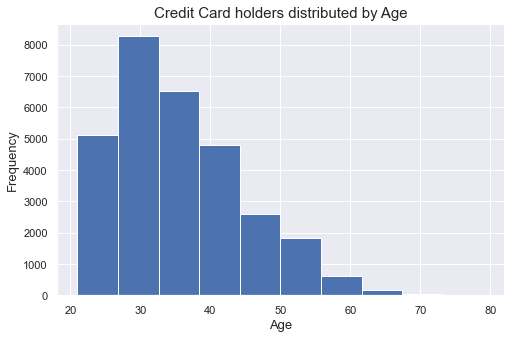

In [23]:
# What does the distribution of age of credit card holders look like?
print(pd.cut(num_cols['age'], bins=5).value_counts()) # by count
num_cols['age'].plot(kind='hist', figsize=(8,5))
plt.title("Credit Card holders distributed by Age", fontsize=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.show()

                age
default_paymt      
0              34.0
1              34.0


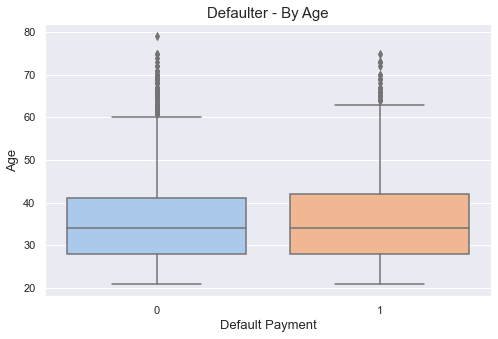

In [24]:
# median age of default payment, Yes and No 
median_age = (num_cols.groupby('default_paymt').agg({'age': 'median'}))
print(median_age)
# Box plot to visualize median age distribution according to passenger class
plt.figure(figsize=(8,5))
sns.boxplot(data=num_cols, x='default_paymt',y='age', palette='pastel')
plt.title("Defaulter - By Age", fontsize=15)
plt.xlabel("Default Payment", fontsize=13)
plt.ylabel("Age", fontsize=13)
plt.show()

The above plot shows that most of the defaulter and non-defaulters belong to age groups >25 yrs to arouns 40yrs with some outliers in both categories going upto >70yrs.

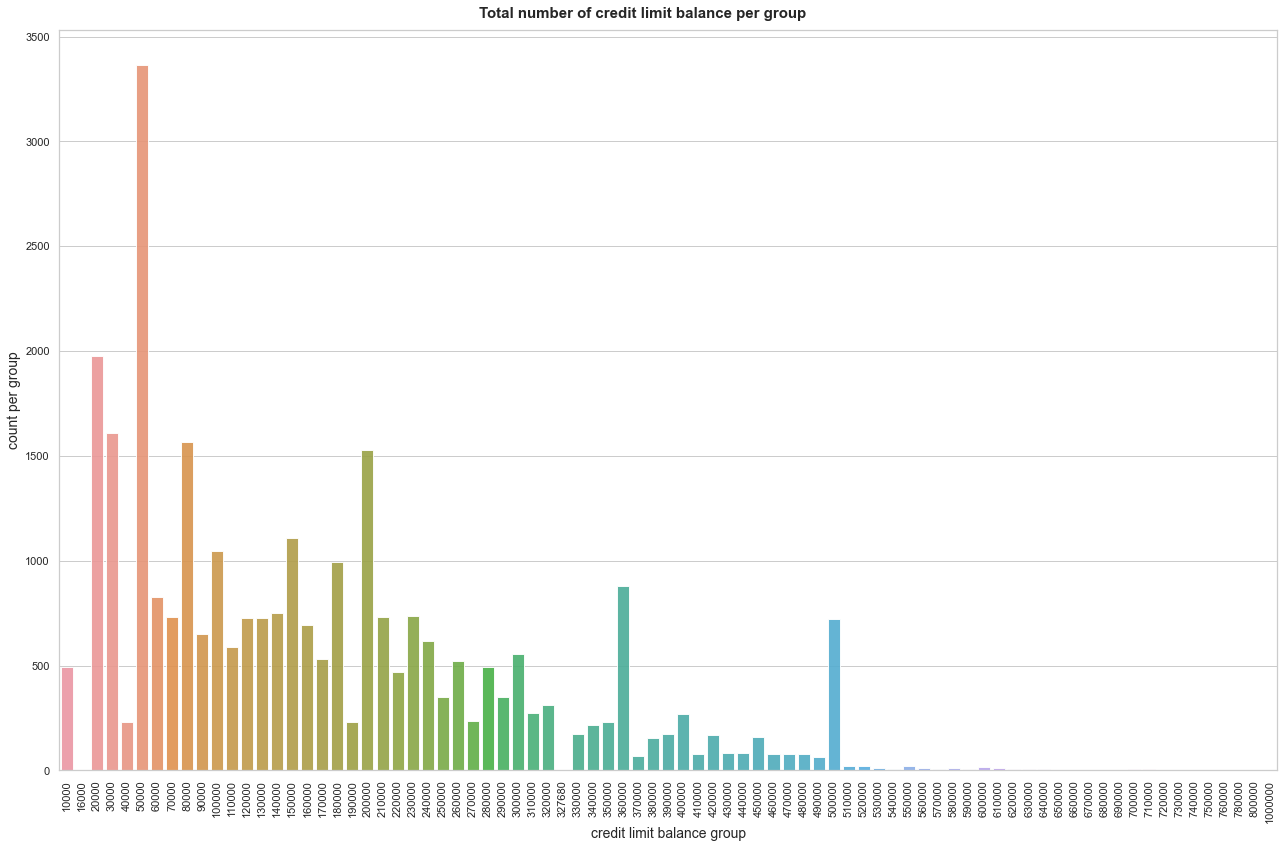

In [25]:
# Plot of credit limit balance grouped to see the highest count
sns.set(style='whitegrid')
fig = plt.figure(figsize=(18,12))
fig.suptitle('Total number of credit limit balance per group', fontsize=15, fontweight='bold')
plt.xlabel('credit limit balance group', fontsize=14)
plt.ylabel('count per group', fontsize=14)
sns.barplot(x=credit_lim.index, y=list(credit_lim.values), alpha=0.9)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

__Observation:__

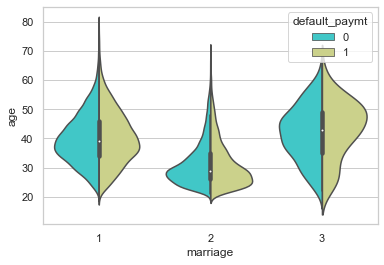

In [27]:
sns.violinplot(data=credit_df1, x='marriage' ,
           y='age', hue='default_paymt', split=True, palette='rainbow')
plt.show()

__Observation:__

In [28]:
# Frequency of categorical variables by default, yes or no
cat_def = pd.concat([cat_cols, credit_df['default_paymt']], axis=1)

In [29]:
cat_def.head()

,sex,education,marriage,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_paymt
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0


default_paymt    1.000000
age              0.013890
bill_amt6       -0.005372
bill_amt5       -0.006760
bill_amt4       -0.010156
bill_amt3       -0.014076
bill_amt2       -0.014193
bill_amt1       -0.019644
pay_amt6        -0.053183
pay_amt5        -0.055124
dtype: float64


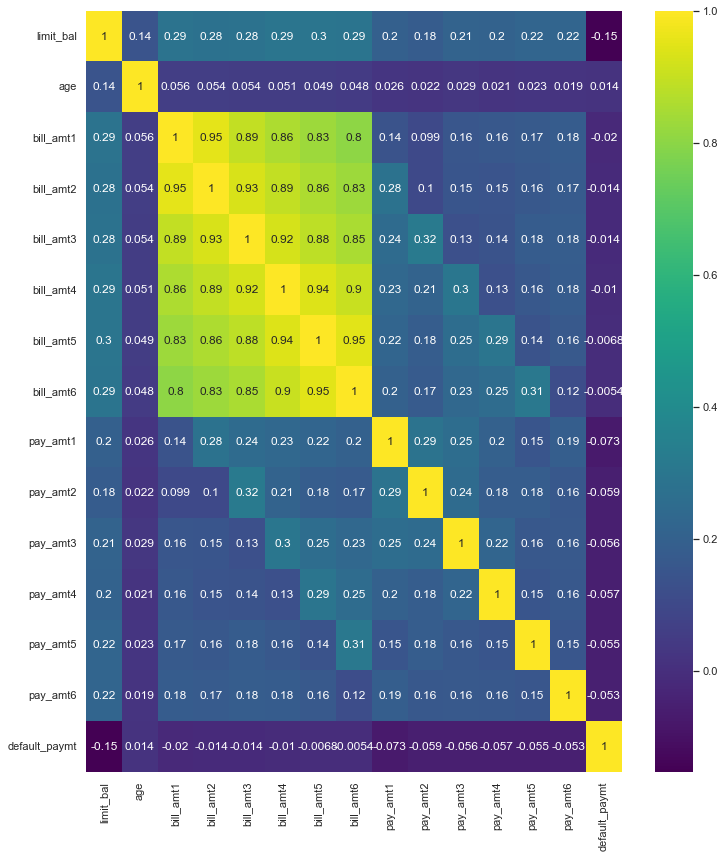

In [30]:
# Check correlation of numeric data
corr_mat = num_cols.corr()
# Correlation with target data
print(num_cols.corrwith(num_cols['default_paymt']).sort_values(ascending=False).head(10))
# Plot correlation
plt.figure(figsize=(12,14))
sns.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

Except for high positive correlation among the billing amounts and their payment amounts, for months of April 2005 to September 2005, there is not much correlation among the numeric variables.

## Splitting Data into Train and Test Sets

In [31]:
X = credit_df1.drop(['default_paymt'], axis=1)
y = credit_df1['default_paymt'].copy()

## Preprocessing Data

The categorical columns will be encoded using pandas get_dummies and the numerical data will be scaled using RobustScaler since we have outliers.

In [32]:
# Select numerical feature columns from X
num_cols1 = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# Select categorical feature columns from X
cat_cols1 = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6']

# Scale the numerical features using RobustScaler
rc = RobustScaler()
X[num_cols1] = rc.fit_transform(X[num_cols1])

In [33]:
# Convert categorical variables into numerical
X = pd.get_dummies(X, columns=cat_cols1, drop_first=True)
X.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_8,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,-0.631579,-0.769231,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,...,0,0,0,0,0,0,0,0,0,0
1,-0.105263,-0.615385,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,...,0,0,0,1,0,0,0,0,0,0
2,-0.263158,0.000000,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,...,0,0,1,0,0,0,0,0,0,0
3,-0.473684,0.230769,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,...,0,0,1,0,0,0,0,0,0,0
4,-0.473684,1.769231,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,...,0,0,1,0,0,0,0,0,0,0


In [74]:
# Use Stratified Shuffle Split to split data 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

In [75]:
# Create dataframe from indexes
X_train = X.loc[train_idx,]
y_train = y.loc[train_idx,]
# Create test set
X_test = X.loc[test_idx,]
y_test = y.loc[test_idx,]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 78) (24000,)
(6000, 78) (6000,)


In [76]:
# Use over-sampling with ADA
ada = ADASYN(random_state=42, sampling_strategy='minority')
X_train, y_train = ada.fit_resample(X_train,y_train)
X_res_tst, y_res_tst = ada.fit_resample(X_test, y_test)

In [77]:
print(X_train.shape, y_train.shape)
print(X_res_tst.shape, y_res_tst.shape)

(37111, 78) (37111,)
(9378, 78) (9378,)


In [78]:
#PrettyTable
PTable = PrettyTable()
PTable.field_names = ["Model Name", "Overall Accuracy", "Overall Error"]

# Define a dict of models
model_dict = {
    "logr": LogisticRegression(),
    "tree_clf": DecisionTreeClassifier(max_depth=2),
    "rf_clf": RandomForestClassifier(max_depth=2, random_state=42),
    "knn_clf": KNeighborsClassifier(n_neighbors=3),
    "svc_clf": SVC(probability=True),
    "sgd_clf": SGDClassifier(max_iter=300, tol=1e-3, random_state=42),
}

# Looping through the dict and training models
for (name, model) in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    # Accuracy score
    acc_score = accuracy_score(y_train, y_pred)
    # Overall accuracy score
    o_acc_score = model.score(X_train, y_train)
    # Overall error rate
    z_loss = zero_one_loss(y_train, y_pred)
    # Cross-validation for better accuracy
#     cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    # Accuracy score using cross validation
#     acc_cv = round(accuracy_score(y_train, y_pred_cv), 3)
    # Overall error CV
#     z_loss_cv = zero_one_loss(y_train,y_pred_cv)
#     # Decision function threshold for every predicted point
#     y_scores = cross_val_predict(model, X_train, y_train, cv=5, method='decision_function')
#     # ROC_auc_score, area under curve
#     roc_auc = roc_auc_score(y_train, y_scores)
    
    # Add to pretty table
    PTable.add_row([name, o_acc_score, z_loss])
    # Print Pretty Table
print(PTable)


C:\Users\saswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+------------+--------------------+---------------------+
| Model Name |  Overall Accuracy  |    Overall Error    |
+------------+--------------------+---------------------+
|    logr    | 0.7014092856565439 |  0.2985907143434561 |
|  tree_clf  | 0.651181590364043  |  0.348818409635957  |
|   rf_clf   | 0.662175635256393  |  0.337824364743607  |
|  knn_clf   | 0.9025086901457788 | 0.09749130985422116 |
|  svc_clf   | 0.7156099269758293 | 0.28439007302417074 |
|  sgd_clf   | 0.6851607340141737 | 0.31483926598582634 |
+------------+--------------------+---------------------+


 Looking at the accuracy, overall accuracy and overall error scores of the trained models, the top three classifiers with their scores are:
  
 1. KNN Classifier              
 2. Support Vector Machine      
 3. Logistic Regression  
 
 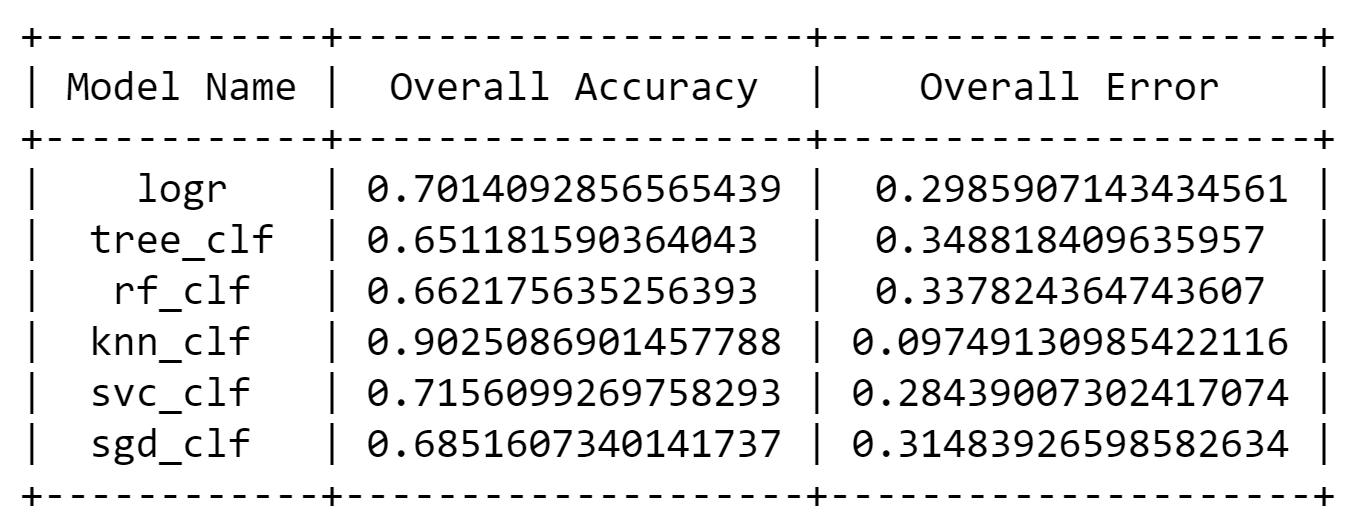

 Next we will do hyperparameter tuning and training only three of these models to find the best one.

## Hyperparameter Tuning for top three models

### Model - KNN Classifier

In [79]:
# Find best training parameters - K Neighbor Classifier
knn_clf = KNeighborsClassifier()
k_range = range(1, 21)
param_knn = {"n_neighbors":(k_range)}

# define gridsearch
grid_knn = GridSearchCV(knn_clf, param_knn, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
grid_res_knn = grid_knn.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_res_knn.best_score_, grid_res_knn.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best: 0.826709 using {'n_neighbors': 1}


In [80]:
# K Neighbor Classification using best score
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_train)
accuracy_knn= accuracy_score(y_train, y_pred)

In [81]:
# Evaluate model using cross-validation
scores_knn = cross_val_score(knn_best, X_train, y_train,cv=5, scoring='accuracy')
# report performance
print('Accuracy and standard deviation: %.3f (%.3f)' % (np.mean(scores_knn), np.std(scores_knn)))

Accuracy and standard deviation: 0.827 (0.005)


In [82]:
# Cross-validation prediction
y_pred_cv = cross_val_predict(knn_best, X_train, y_train, cv=5)
# y_val_pred
acc_cv = round(accuracy_score(y_train, y_pred_cv), 2)
print(acc_cv)

0.83


In [83]:
# KNN Classification Report
print(classification_report(y_train,y_pred_cv))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81     18691
           1       0.77      0.93      0.84     18420

    accuracy                           0.83     37111
   macro avg       0.84      0.83      0.83     37111
weighted avg       0.84      0.83      0.82     37111



KNN Confusion Matrix


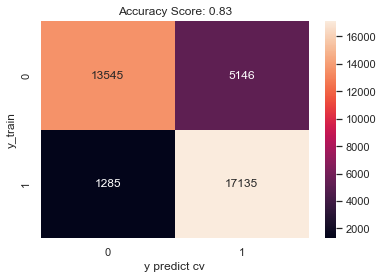

In [84]:
# Create confusion matrix
cm_knn = confusion_matrix(y_train,y_pred_cv)
print("KNN Confusion Matrix")
# Plot confusion matrix
sns.heatmap(cm_knn, annot=True, fmt="d")
plt.xlabel("y predict cv", size=12)
plt.ylabel("y_train", size=12)
plt.title("Accuracy Score: {}".format(acc_cv), size=12)
plt.show()

In [85]:
# Get y_scores
y_scores = knn_best.predict_proba(X_train)
print(y_scores[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


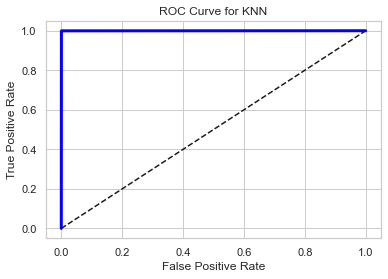

In [86]:
# Calculate a ROC curve, by calculating TPR, FPR from data labels and decision function thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])
# Plot roc curve
plt.plot(fpr,tpr, linewidth=3, c="blue")
plt.title("ROC Curve for KNN", size=12)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],"k--")
plt.show()

In [87]:
# ROC_auc_score, area under curve
print("KNN ROC auc score:",roc_auc_score(y_train, y_scores[:, 1]))

KNN ROC auc score: 0.9995955888354241


### Model - Logistic Regression 

In [88]:
# Find best training parameters - Logistic Regression
lr = LogisticRegression()
param_lr = {
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [800]
}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_lr, n_jobs=-1, cv=5, scoring='accuracy')
grid_res_lr = grid_lr.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_res_lr.best_score_, grid_res_lr.best_params_))

Best: 0.698392 using {'C': 0.1, 'max_iter': 800, 'penalty': 'l2', 'solver': 'lbfgs'}


In [89]:
# Logistic regression using best params
lr_best = LogisticRegression(C=0.1, penalty='l2', solver= 'lbfgs', max_iter=800 )
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_train)
accuracy_lr = accuracy_score(y_train, y_pred)

In [90]:
# Evaluate model using cross-validation
scores_lr = cross_val_score(lr_best, X_train, y_train,cv=5, scoring='accuracy')
# report performance
print('Accuracy and standard deviation: %.3f (%.3f)' % (np.mean(scores_lr), np.std(scores_lr)))

Accuracy and standard deviation: 0.698 (0.017)


In [91]:
# Cross-validation prediction
y_pred_cv = cross_val_predict(lr_best, X_train, y_train, cv=5)
# y_val_pred
acc_cv = round(accuracy_score(y_train, y_pred_cv), 2)
print(acc_cv)

0.7


In [92]:
# Logistic Regression Classification Report
print(classification_report(y_train,y_pred_cv))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     18691
           1       0.72      0.64      0.68     18420

    accuracy                           0.70     37111
   macro avg       0.70      0.70      0.70     37111
weighted avg       0.70      0.70      0.70     37111



Logistic Regression Confusion Matrix


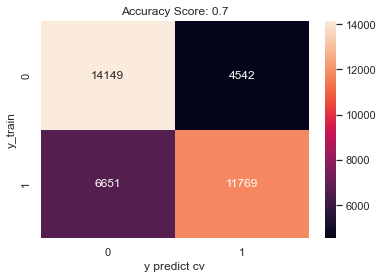

In [93]:
# Create confusion matrix
cm_log = confusion_matrix(y_train,y_pred_cv)
print("Logistic Regression Confusion Matrix")
# Plot confusion matrix
sns.heatmap(cm_log, annot=True, fmt="d")
plt.xlabel("y predict cv", size=12)
plt.ylabel("y_train", size=12)
plt.title("Accuracy Score: {}".format(acc_cv), size=12)
plt.show()

In [94]:
# the decision function threshold for every predicted point
y_scores = cross_val_predict(lr_best, X_train, y_train, cv=5, method='decision_function')
print(y_scores[:5])

[ 0.77128786 -0.14106039  0.98828037 -1.10952638 -0.99714938]


In [95]:
# Create precision recall curve from dataset labels and decision function threshold for the labels (y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)
print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.4964023  0.49638872 0.4964021  0.49641548 0.49642886]
[1.         0.99994571 0.99994571 0.99994571 0.99994571]
[-8.08305957 -7.14050024 -7.11982973 -6.34770358 -6.20208133]


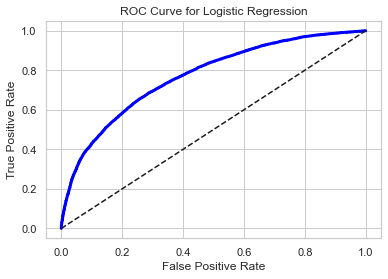

In [96]:
# Calculate a ROC curve, by calculating TPR, FPR from data labels and decision function thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
# Plot roc curve
plt.plot(fpr,tpr, linewidth=3, c="blue")
plt.title("ROC Curve for Logistic Regression", size=12)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],"k--")
plt.show()

In [97]:
# ROC_auc_score, area under curve
print("Logistic Regression ROC auc score:",roc_auc_score(y_train, y_scores))

Logistic Regression ROC auc score: 0.7698923622771642


## Model - SVM Classifier

In [86]:
# # Find best training parameters - SVM Classifier
# svc_clf = SVC(probability=True)
# param_svc = {'C': [1.0, 0.1, 0.01]}
# grid_svc= GridSearchCV(estimator=svc_clf, param_grid=param_svc, n_jobs=-1, cv=5, scoring='accuracy')
# grid_res_svc = grid_svc.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_res_svc.best_score_, grid_res_svc.best_params_))

Best: 0.698715 using {'C': 1.0}


 This search went for exceedingly long time, about 12 hours. So, need to try C values, using smaller quantities at a time.

In [87]:
# # SVM using best params
# svc_best = SVC(probability=True, C=1.0)
# svc_best.fit(X_train, y_train)
# y_pred = svc_best.predict(X_train)
# accuracy_svc = accuracy_score(y_train, y_pred)

In [ ]:
# # Evaluate model using cross-validation
# score_svc = cross_val_score(svc_best, X_train, y_train,cv=5, scoring='accuracy')
# # report performance
# print('Accuracy and standard deviation: %.3f (%.3f)' % (np.mean(score_svc), np.std(score_svc)))

Running this classifier is computationally expensive for the capacity of my laptop. Hence, I will not using SVM Classifier for this project.

In [ ]:
# Cross-validation prediction
# y_pred_cv = cross_val_predict(svc_best, X_train, y_train, cv=5)
# # y_val_pred
# acc_cv = round(accuracy_score(y_train, y_pred_cv), 2)
# print(acc_cv)

In [ ]:
# SVM Classification Report
# print(classification_report(y_train,y_pred_cv))

In [ ]:
# # Create confusion matrix
# cm_svc = confusion_matrix(y_train,y_pred_cv)
# print("SVM Confusion Matrix")
# # Plot confusion matrix
# sns.heatmap(cm_svc, annot=True, fmt="d")
# plt.xlabel("y predict cv", size=12)
# plt.ylabel("y_train", size=12)
# plt.title("Accuracy Score: {}".format(acc_cv), size=12)
# plt.show()

In [ ]:
# # the decision function threshold for every predicted point
# y_scores = cross_val_predict(svc_best, X_train, y_train, cv=5, method='decision_function')
# print(y_scores[:5])

In [ ]:
# # Create precision recall curve from dataset labels and decision function threshold for the labels (y_scores)
# precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)
# print(precisions[:5])
# print(recalls[:5])
# print(thresholds[:5])

In [ ]:
# # Create precision recall curve from dataset labels and decision function threshold for the labels (y_scores)
# precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)
# print(precisions[:5])
# print(recalls[:5])
# print(thresholds[:5])

In [ ]:
# # Calculate a ROC curve, by calculating TPR, FPR from data labels and decision function thresholds
# fpr, tpr, thresholds = roc_curve(y_train, y_scores)
# # Plot roc curve
# plt.plot(fpr,tpr, linewidth=3, c="blue")
# plt.title("ROC Curve for SVM ", size=12)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.plot([0,1],[0,1],"k--")
# plt.show()

In [ ]:
# # ROC_auc_score, area under curve
# print("SVM ROC auc score:",roc_auc_score(y_train, y_scores))

## Predict Test Data using KNN and Logistic Regression

In [98]:
y_pred_tst = knn_best.predict(X_res_tst)
acc_tst = (y_res_tst, y_pred_tst)
print("Accuracy Score:", acc_tst)

Accuracy Score: (0       0
1       0
2       0
3       1
4       0
       ..
9373    1
9374    1
9375    1
9376    1
9377    1
Name: default_paymt, Length: 9378, dtype: int64, array([0, 0, 0, ..., 0, 1, 1], dtype=int64))


In [99]:
# Evaluate KNN model using cross-validation
score_knn_tst = cross_val_score(knn_best, X_res_tst, y_res_tst,cv=5, scoring='accuracy')
# report performance
print('Accuracy and standard deviation: %.3f (%.3f)' % (np.mean(score_knn_tst), np.std(score_knn_tst)))

Accuracy and standard deviation: 0.830 (0.003)


In [100]:
# Test Classification Report
print(classification_report(y_res_tst, y_pred_tst))

              precision    recall  f1-score   support

           0       0.60      0.74      0.67      4673
           1       0.67      0.52      0.58      4705

    accuracy                           0.63      9378
   macro avg       0.64      0.63      0.63      9378
weighted avg       0.64      0.63      0.62      9378



Test Data Confusion Matrix


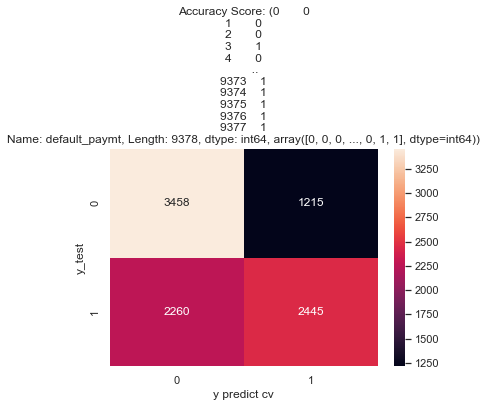

In [101]:
# Create confusion matrix
cm_tst = confusion_matrix(y_res_tst,y_pred_tst)
print("Test Data Confusion Matrix")
# Plot confusion matrix
sns.heatmap(cm_tst, annot=True, fmt="d")
plt.xlabel("y predict cv", size=12)
plt.ylabel("y_test", size=12)
plt.title("Accuracy Score: {}".format(acc_tst), size=12)
plt.show()

In [102]:
# Get y_scores
y_scores_tst = knn_best.predict_proba(X_res_tst)
print(y_scores_tst[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


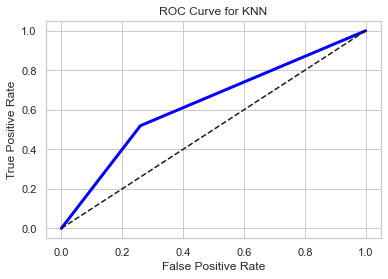

In [103]:
# Calculate a ROC curve, by calculating TPR, FPR from data labels and decision function thresholds
fpr, tpr, thresholds = roc_curve(y_res_tst, y_scores_tst[:, 1])
# Plot roc curve
plt.plot(fpr,tpr, linewidth=3, c="blue")
plt.title("ROC Curve for KNN", size=12)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],"k--")
plt.show()

In [104]:
# ROC_auc_score, area under curve
print("KNN ROC auc score:",roc_auc_score(y_res_tst, y_scores_tst[:, 1]))

KNN ROC auc score: 0.6298278281661014


In [105]:
# Logistic regression test
y_pred_tstlr = lr_best.predict(X_res_tst)
acc_tstlr = (y_res_tst, y_pred_tstlr)
print("Accuracy Score:", acc_tstlr)

Accuracy Score: (0       0
1       0
2       0
3       1
4       0
       ..
9373    1
9374    1
9375    1
9376    1
9377    1
Name: default_paymt, Length: 9378, dtype: int64, array([0, 1, 0, ..., 1, 1, 1], dtype=int64))


In [106]:
# Evaluate Log. Regression  model using cross-validation
score_lr_tst = cross_val_score(lr_best, X_res_tst, y_res_tst,cv=5, scoring='accuracy')
# report performance
print('Accuracy and standard deviation: %.3f (%.3f)' % (np.mean(score_lr_tst), np.std(score_lr_tst)))

Accuracy and standard deviation: 0.723 (0.031)


In [107]:
# Test Classification Report
print(classification_report(y_res_tst, y_pred_tstlr))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4673
           1       0.74      0.68      0.71      4705

    accuracy                           0.72      9378
   macro avg       0.72      0.72      0.72      9378
weighted avg       0.72      0.72      0.72      9378



Test Data Confusion Matrix


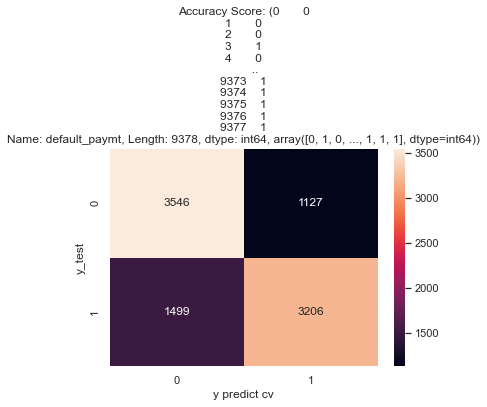

In [108]:
# Create confusion matrix
cm_tstlr = confusion_matrix(y_res_tst,y_pred_tstlr)
print("Test Data Confusion Matrix")
# Plot confusion matrix
sns.heatmap(cm_tstlr, annot=True, fmt="d")
plt.xlabel("y predict cv", size=12)
plt.ylabel("y_test", size=12)
plt.title("Accuracy Score: {}".format(acc_tstlr), size=12)
plt.show()

In [109]:
# the decision function threshold for every predicted point
y_scoreslr = cross_val_predict(lr_best, X_res_tst, y_res_tst, cv=5, method='decision_function')
print(y_scoreslr[:5])

[-0.93414645  1.24228531 -0.08324727 -1.19607709 -0.43646355]


In [110]:
# Create precision recall curve from dataset labels and decision function threshold for the labels (y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_res_tst,y_scoreslr)
print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.50218807 0.50213493 0.50218853 0.50224215 0.50229578]
[1.         0.99978746 0.99978746 0.99978746 0.99978746]
[-7.48055848 -7.25345975 -7.17616551 -7.16422722 -7.11121135]


In [112]:
# ROC_auc_score, area under curve
print("Logistic ROC auc score:",roc_auc_score(y_res_tst, y_scoreslr))

Logistic ROC auc score: 0.7954891338830502
